In [ ]:
####################################################################################################################################################################
####################################################################################################################################################################
######################################### PROGRAM TO PERFORM ONE-WAY AND TWO-WAY ANOVA - ON SAMPLE DATA ############################################################
####################################################################################################################################################################
####################################################################################################################################################################

## Oneway Anova: Small Sample data created with manual input
## Twoway Anova: Ecommerce AB Testing data downloaded from Kaggle

In [ ]:
##################################################################################################################################################################
########################################################### ONE WAY ANOVA ########################################################################################
##################################################################################################################################################################

import pandas as pd
import numpy as np

############################################## Create a small sample 3-groups data ###############################################################################
df = pd.DataFrame({"score": [87, 86, 88, 75, 78, 94, 98, 79, 71, 69,
                             91, 92, 90, 90, 97, 94, 82, 88, 95, 96,
                             88, 78, 88, 94, 93, 85, 83, 85, 82, 81],
                   "group": np.repeat(["A", "B", "C"], repeats=10)})
df

,score,group
0,87,A
1,86,A
2,88,A
3,75,A
4,78,A
5,94,A
6,98,A
7,79,A
8,71,A
9,69,A


In [ ]:
################################################################## Perform one-way ANOVA #########################################################################
import scipy.stats as stats

A = df[df["group"]=="A"].score
B = df[df["group"]=="B"].score
C = df[df["group"]=="C"].score

stats.f_oneway(A, B, C)

#H0: All of the population group means are equal.
#H1: At least one of the group means is different from the others. 

#Since p-value from the ANOVA table is 0.02, less than .05, we reject H0. 
#We have sufficient evidence to say that the mean values across each group are not equal.

F_onewayResult(statistic=4.491727279993608, pvalue=0.02070247518162364)

In [ ]:
################################# Tukey's HSD test: Multiple Pairwise Comparison to Test groups with difference ##################################################
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df['score'],
                          groups=df['group'],
                          alpha=0.05)

print(tukey)

#For each pair wise comparison - 
#H0: The mean of group1 is equal to the mean of group2
#H1: The mean of group1 is not equal to the mean of group2

#Based on results, there is a statistically significant difference between the means of groups a and b (H0 Rejected),
#but not a statistically significant difference between the means of groups a and c, and groups b and c (H0 not Rejected).

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     A      B      9.0  0.017   1.4521 16.5479   True
     A      C      3.2 0.5519  -4.3479 10.7479  False
     B      C     -5.8 0.1566 -13.3479  1.7479  False
-----------------------------------------------------


In [9]:
##################################################################################################################################################################
########################################################### TWO WAY ANOVA ########################################################################################
##################################################################################################################################################################

df = pd.read_csv("../data/ab_data.csv")
############### Data Cleaning - Include only records with group and landing page as treatment-newpage and control-oldpage; and remove duplicate users ############
df2 = df[(df["group"]=="treatment")&(df["landing_page"]=="new_page")
                |(df["group"]=="control")&(df["landing_page"]=="old_page")]
df2.drop_duplicates(subset="user_id",inplace=True) 
#################################### Join with Countries Data ####################################################################################################
countries = pd.read_csv("../data/countries.csv")
df3 = df2.merge(countries, on="user_id",how="left")
df3

C:\Users\madan\AppData\Local\Temp\ipykernel_13916\1000274051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop_duplicates(subset="user_id",inplace=True)


,user_id,timestamp,group,landing_page,converted,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,US
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,US
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,US
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,US
...,...,...,...,...,...,...
290580,751197,2017-01-03 22:28:38.630509,control,old_page,0,US
290581,945152,2017-01-12 00:51:57.078372,control,old_page,0,US
290582,734608,2017-01-22 11:45:03.439544,control,old_page,0,US
290583,697314,2017-01-15 01:20:28.957438,control,old_page,0,US


In [10]:
df3.country.value_counts()

country
US    203620
UK     72466
CA     14499
Name: count, dtype: int64

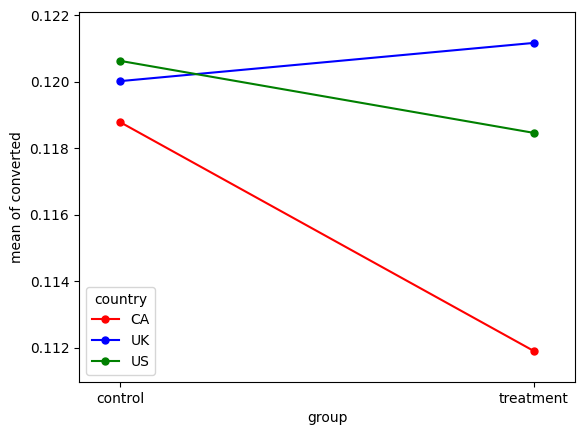

In [ ]:
################################ Plot the interaction plot of Country on Treatment and control group conversion rates ##################################################
from statsmodels.graphics.factorplots import interaction_plot
fig = interaction_plot(x=df3.group, trace=df3.country, response=df3.converted, colors=['red','blue','green'], ms=10)

In [ ]:
########################################### Perform Two Way Anova test ###############################################################################################
import pingouin as pg
aov = pg.anova(dv="converted", between=["group","country"], data=df3, detailed=True)
print(aov)

#H0 (FactorA): There are no significant differences in the population means across the levels of Factor A
#H1 (FactorA): At least one population mean for a level of Factor A is different from the others

# Based on below results H0 cannot be rejected for either 'group' or 'country' or 'group * country' (group-country interaction), as p-value >0.05
# So, there is no significant difference between avg conversion rate across control/treatment groups or across countries

            Source            SS        DF        MS         F     p-unc  \
0            group      0.180029       1.0  0.180029  1.709797  0.191013   
1          country      0.336956       2.0  0.168478  1.600092  0.201880   
2  group * country      0.254205       2.0  0.127102  1.207132  0.299055   
3         Residual  30595.884432  290579.0  0.105293       NaN       NaN   

        np2  
0  0.000006  
1  0.000011  
2  0.000008  
3       NaN  
